In [89]:
import cPickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

Initation rates:

In [15]:
init_rates = pkl.load(open("../../parameters/init_rates_plotkin.p", "r"))

Transcriptome:

In [22]:
transcriptome_plotkin = pkl.load((open('../../parameters/transcriptome_plotkin.p')))

Exome:

In [16]:
exome =  pkl.load(open("../../parameters/orf_coding.p", "rb"))

In [21]:
orf_lengths = {prot: len(exome[prot]) for prot in exome}

Common genes:

In [19]:
genes = list(set(exome) & set(transcriptome_plotkin) & set(init_rates))

In [20]:
len(genes)

4716

In [61]:
df1 = pd.DataFrame.from_dict(init_rates, orient='index')
df2 = pd.DataFrame.from_dict(transcriptome_plotkin, orient='index')
df3 = pd.DataFrame.from_dict(orf_lengths, orient='index')
df = pd.merge(df1, df2, left_index=True, right_index=True)
df = pd.merge(df, df3, left_index=True, right_index=True)

In [66]:
df.columns = ['init', 'count', 'length']
df.index.name = 'gene'

In [67]:
df

,init,count,length
gene,,,
YBR177C,1.644214e-06,8,1356
YIL140W,1.649229e-06,5,2472
YLR268W,1.844285e-06,10,645
YOR011W,2.686820e-07,3,4185
YLR357W,1.173926e-06,8,2670
YJL155C,1.490352e-06,2,1359
YHR067W,6.017500e-07,4,843
YAL008W,3.024409e-06,2,597
YOR043W,7.775814e-07,8,1461


In [96]:
plt.close('all')

plt.rc('font',family='serif')
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'
plt.rcParams['font.size'] = '16'

hfont = {'fontname': u'Adobe Caslon Pro'}

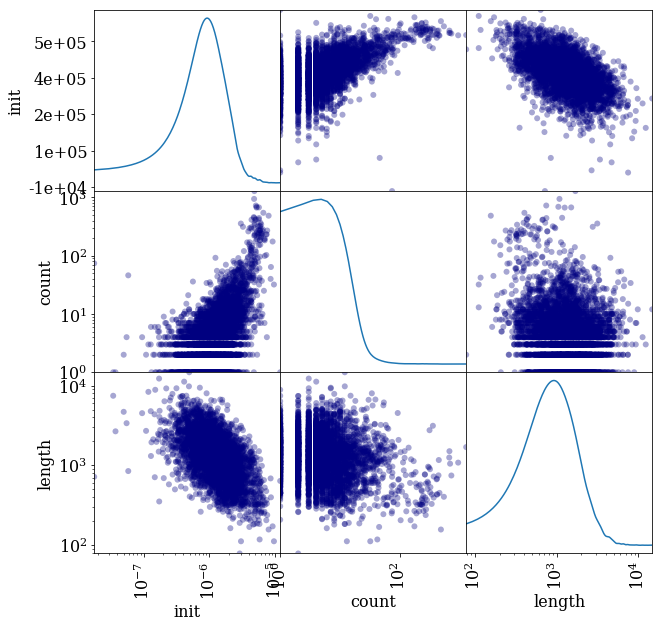

In [98]:
axl = pd.plotting.scatter_matrix(df, marker='o', c='navy', alpha=0.35, figsize=(10, 10), diagonal='kde')
for i, axs in enumerate(axl):
    for j, ax in enumerate(axs):
        mini = df[df.columns[i]].min()
        minj = df[df.columns[j]].min()
        if i != j:  # only the scatter plots
            # scale plot axes by their mins and maxs
            ax.set_xlim([minj, df[df.columns[j]].max()]) 
            ax.set_ylim([mini, df[df.columns[i]].max()])
            ax.set_xscale('log')
            ax.set_yscale('log')
            plt.setp(ax.get_xticklabels(), fontsize=16)
            plt.setp(ax.get_yticklabels(), fontsize=16)
        else:       # only the density plots
            ax.set_xlim([minj, df[df.columns[j]].max()])
            ax.set_xscale('log')
            plt.setp(ax.get_xticklabels(), fontsize=16)
            plt.setp(ax.get_yticklabels(), fontsize=16)
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.e'))